In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('PrepHR.csv')
df = df.drop(columns='Unnamed: 0')

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df['Education'].unique()

array(['Higher Secondary', 'High School', 'Masters', 'Bacherlors',
       'Doctorate'], dtype=object)

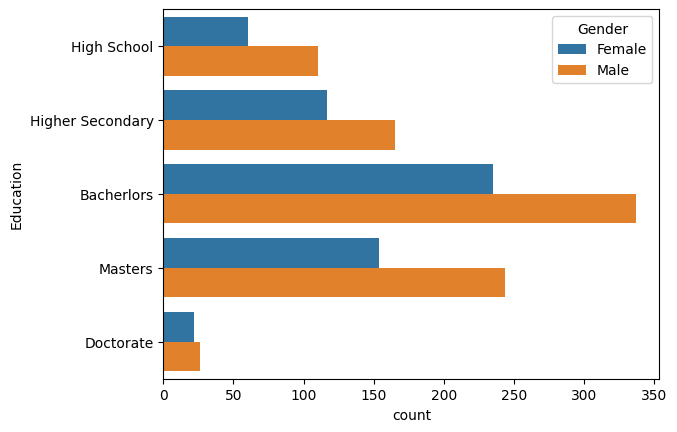

In [6]:
order = ['High School','Higher Secondary','Bacherlors','Masters','Doctorate']
sns.countplot(data = df,y='Education',order=order,hue='Gender')
plt.show()

<Axes: xlabel='count', ylabel='Department'>

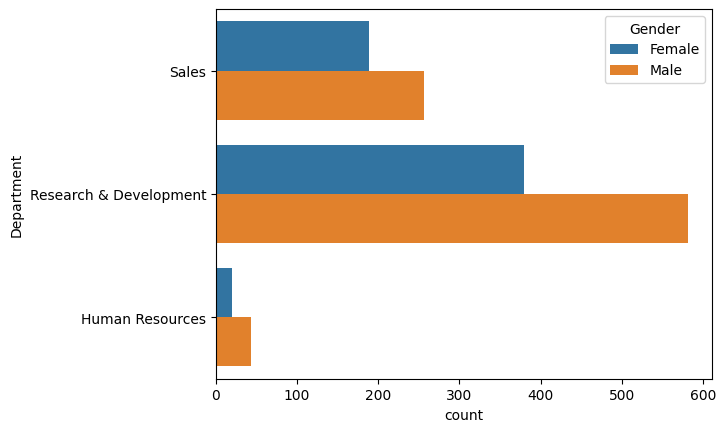

In [7]:
sns.countplot(data = df,y='Department',hue='Gender')

<Axes: xlabel='count', ylabel='MaritalStatus'>

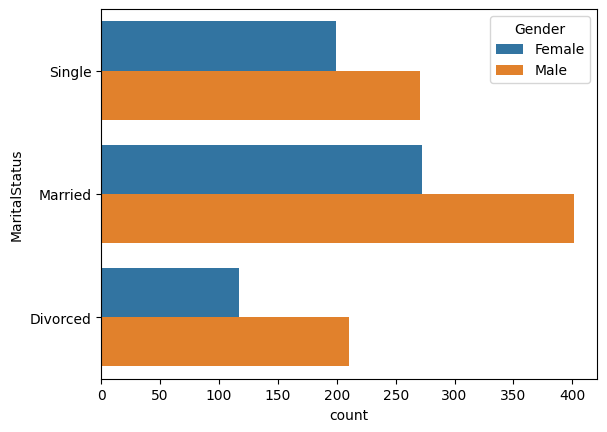

In [8]:
sns.countplot(data = df,y='MaritalStatus',hue='Gender')

<Axes: xlabel='count', ylabel='Gender'>

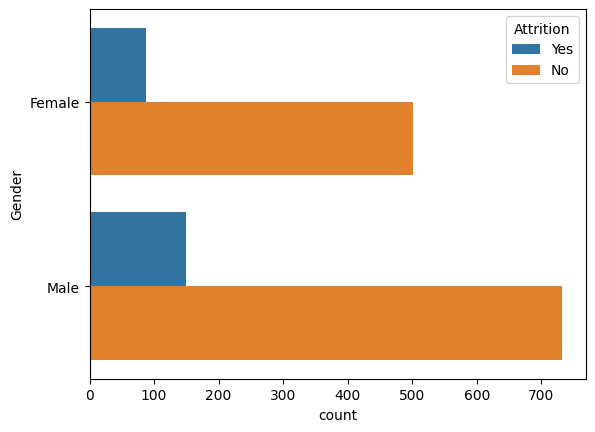

In [9]:
sns.countplot(data = df,y='Gender',hue='Attrition')

In [10]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Gender'], df['Attrition'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the test results
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 1.1169671241970975
p-value: 0.29057244902890855


In [14]:
categorical_columns = df.select_dtypes(include=['object'])

# Create an empty DataFrame for the correlation table
correlation_table = pd.DataFrame(index=categorical_columns.columns, columns=categorical_columns.columns)

# Perform the chi-square test for each pair of categorical columns
for col1 in categorical_columns.columns:
    for col2 in categorical_columns.columns:
        contingency_table = pd.crosstab(categorical_columns[col1], categorical_columns[col2])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        correlation_table.loc[col1, col2] = p

In [15]:

correlation_table

,Attrition,BusinessTravel,Department,Education,EducationField,Gender,JobRole,MaritalStatus,OverTime
Attrition,0.0,0.000006,0.004526,0.545525,0.006774,0.290572,0.0,0.0,0.0
BusinessTravel,0.000006,0.0,0.995236,0.587116,0.879649,0.133229,0.744826,0.111618,0.240053
Department,0.004526,0.995236,0.0,0.936588,0.0,0.227127,0.0,0.15567,0.954275
Education,0.545525,0.587116,0.936588,0.0,0.009195,0.545698,0.038064,0.617163,0.405205
EducationField,0.006774,0.879649,0.0,0.009195,0.0,0.709016,0.0,0.477613,0.881482
Gender,0.290572,0.133229,0.227127,0.545698,0.709016,0.0,0.041954,0.169667,0.121548
JobRole,0.0,0.744826,0.0,0.038064,0.0,0.041954,0.0,0.042464,0.583831
MaritalStatus,0.0,0.111618,0.15567,0.617163,0.477613,0.169667,0.042464,0.0,0.664739
OverTime,0.0,0.240053,0.954275,0.405205,0.881482,0.121548,0.583831,0.664739,0.0


In [18]:
categorical_columns = df.select_dtypes(include=['object'])

# Create an empty DataFrame for the correlation table
correlation_table = pd.DataFrame(index=categorical_columns.columns, columns=categorical_columns.columns)

# Perform the chi-square test for each pair of categorical columns
for col1 in categorical_columns.columns:
    for col2 in categorical_columns.columns:
        contingency_table = pd.crosstab(categorical_columns[col1], categorical_columns[col2])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        correlation_table.loc[col1, col2] = p

# Convert p-values to numeric data type
correlation_table = correlation_table.astype(float)

<Axes: >

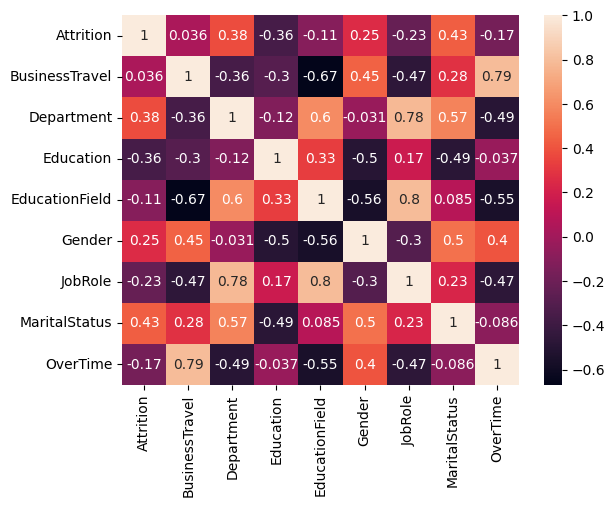

In [19]:
sns.heatmap(data=correlation_table.corr(),annot = True)

In [24]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

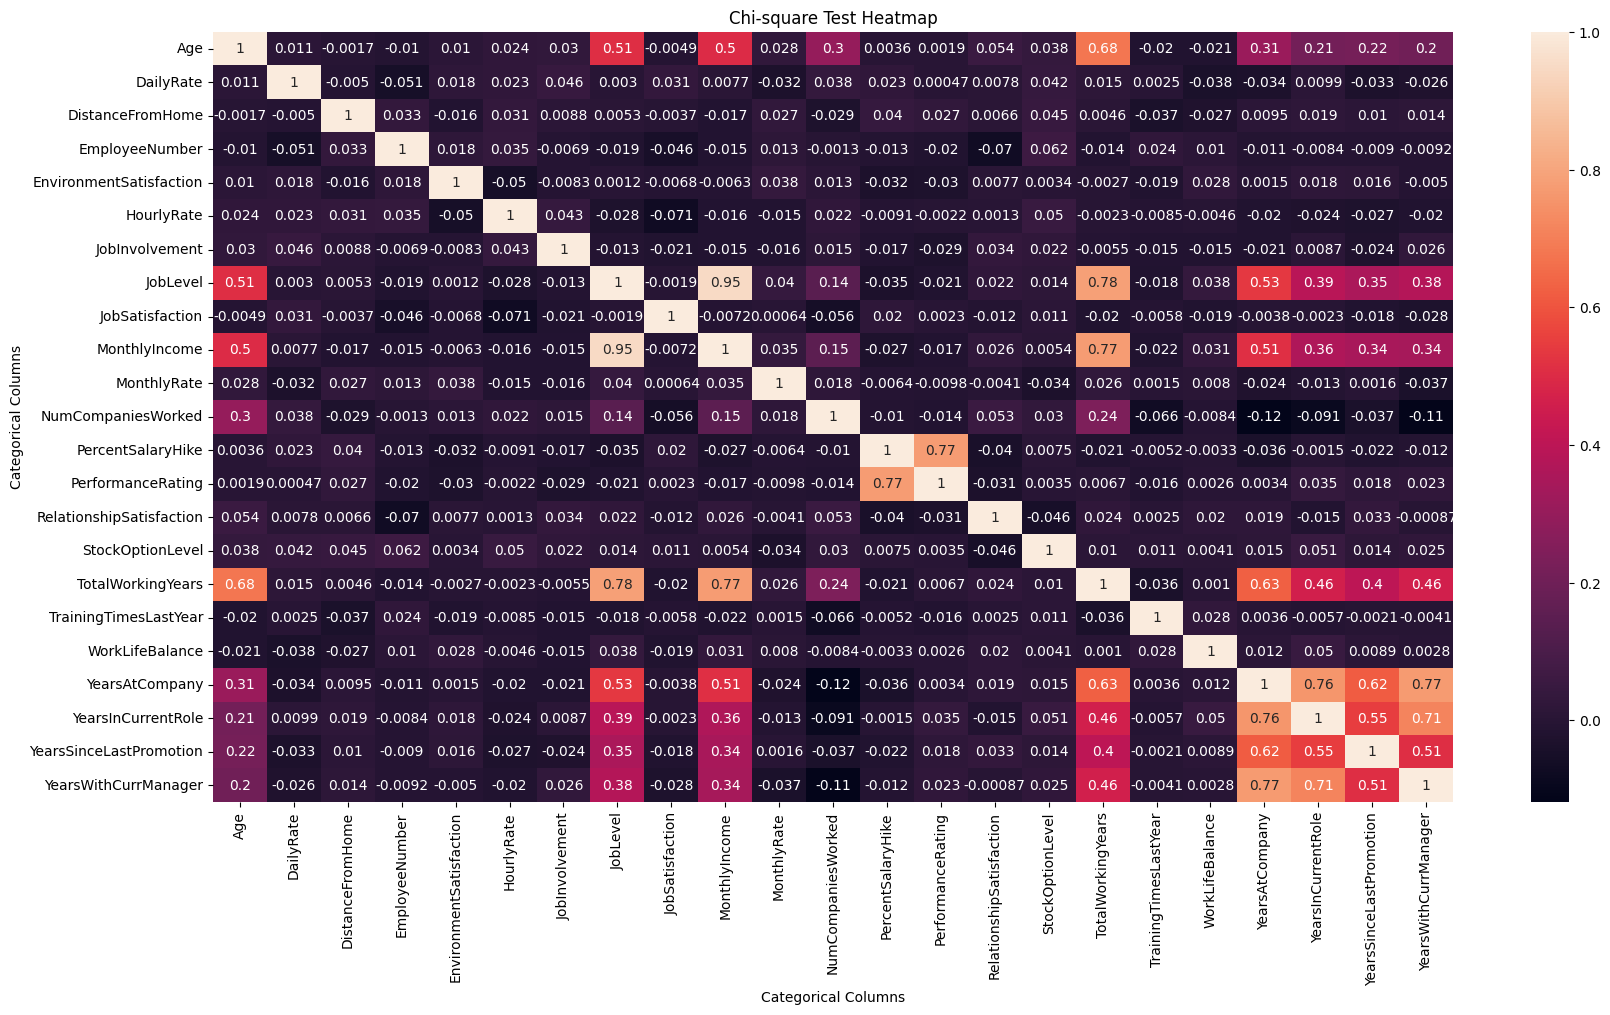

In [32]:
df2= df.drop(columns=['StandardHours'])
numerical_col = df2.select_dtypes(include=['int64'])
# sns.heatmap(data = numerical_col.corr(),annot = True)


plt.figure(figsize=(20, 10))

# Create the heatmap using seaborn
sns.heatmap(data=numerical_col.corr(), annot=True)
# Set plot labels and title
plt.xlabel('Categorical Columns')
plt.ylabel('Categorical Columns')
plt.title('Chi-square Test Heatmap')

# Display the plot
plt.show()